In [23]:
#Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#update pandas display option
pd.set_option("display.max.columns", None)

In [3]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

In [6]:
raw_eqk.info

<bound method DataFrame.info of                            time   latitude   longitude   depth   mag  \
0       2014-01-31 23:53:37.000  60.252000 -152.708100   90.20  1.10   
1       2014-01-31 23:48:35.452  37.070300 -115.130900    0.00  1.33   
2       2014-01-31 23:47:24.000  64.671700 -149.252800    7.10  1.30   
3       2014-01-31 23:30:54.000  63.188700 -148.957500   96.50  0.80   
4       2014-01-31 23:30:52.210  32.616833 -115.692500   10.59  1.34   
...                         ...        ...         ...     ...   ...   
120103  2014-12-01 00:10:16.000  60.963900 -146.762900   14.80  3.80   
120104  2014-12-01 00:09:39.000  58.869100 -154.415900  108.40  2.40   
120105  2014-12-01 00:09:25.350  38.843498 -122.825836    2.37  0.43   
120106  2014-12-01 00:05:54.000  65.152100 -148.992000    9.50  0.40   
120107  2014-12-01 00:04:05.000  60.227200 -147.024500    2.50  1.60   

                id                              place        type  
0       ak11155107  26km S of Redou

In [21]:
#Check which are the unique values for the type of earthquakes.
print(raw_eqk.type.unique())


#Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.

raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag > 6.5)]


#Store this as a new dataframe called eqk

eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag > 6.5)]



['earthquake' 'quarry blast' 'quarry' 'mining explosion' 'rock burst'
 'explosion' 'landslide' 'sonicboom' 'sonic boom' 'anthropogenic event'
 'acoustic noise']


<AxesSubplot:>

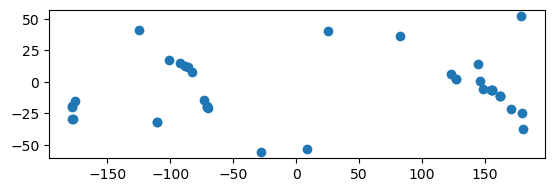

In [25]:
#Overwrite eqk dataframe as a geopandas.GeoDataFrame. HINT: find the CRS of the dataset by looking at the metadata.
eqk = gpd.GeoDataFrame(eqk, #data for geo-dataframe # specify/create a geometry colum 
                               geometry = gpd.points_from_xy(eqk.longitude,
                                                           eqk.latitude),
                               #specify crs 
                               crs = 'WGS84')


#Make a simple plot of the eqk data.
eqk.plot()

In [26]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Text(0.5, 1.0, 'Earthquakes of geo magnitude 6.5 in 2014')

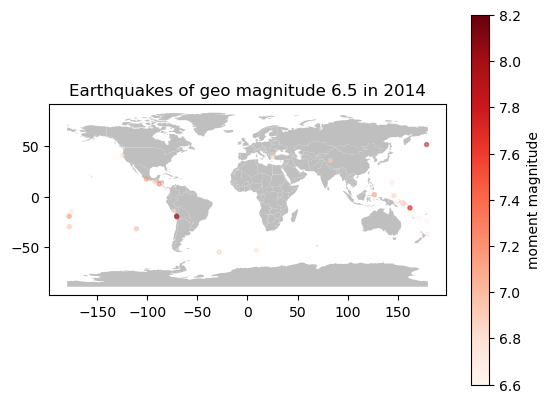

In [63]:
#Create a map of the earthquakes of magnitude greater equal to 6.5 across the world in 2014.
fig,ax = plt.subplots()
worldmap.plot(ax = ax, color = '.75')
eqk.plot(ax = ax, column = "mag",
                 cmap = 'Reds',
                 alpha = 0.5,
                 markersize = 8,
         legend = True,
         legend_kwds={'label': "moment magnitude",  # Add a legend title here
                      'orientation': "vertical"}
        )
ax.set_title('Earthquakes of geo magnitude 6.5 in 2014')


